# 1. Introduction

=================================================

Milestone 2

Nama : Sesilia Virdha Kezia

Batch : HCK-027

Membangun dan mengimplementasikan model machine learning regresi yang akurat menggunakan data Airbnb Amsterdam untuk memprediksi harga sewa, sehingga dapat membantu pemilik properti dalam menetapkan harga. Diuji dengan 5 Model regresi untuk dibandingkan dan pilih model terbaik untuk dilakukan Hyperparameter Tuning.

dataset = https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data

deployment = https://huggingface.co/spaces/sesiliavk/Milestone2

=================================================

# 2. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Regressor Models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import pickle

# Latar Belakang Masalah:
Airbnb telah menjadi salah satu platform penyewaan akomodasi paling populer di dunia, termasuk di kota-kota besar seperti Amsterdam. Dengan banyaknya pilihan listing yang tersedia dari segi lokasi, tipe kamar, kapasitas tamu, hingga kualitas pelayanan dan penentuan harga sewa yang tepat menjadi hal yang krusial baik bagi pemilik properti maupun calon penyewa.

Namun, dalam praktiknya, banyak pemilik kesulitan menentukan harga yang optimal. Harga terlalu tinggi dapat membuat listing tidak kompetitif, sementara harga terlalu rendah dapat menyebabkan kerugian. Oleh karena itu, dibutuhkan pendekatan berbasis data untuk memprediksi harga sewa secara akurat dengan mempertimbangkan berbagai faktor seperti tipe kamar, jarak dari pusat kota, rating kebersihan, dan kepuasan tamu.

Proyek ini tidak hanya bermanfaat untuk membantu pemilik menetapkan harga sewa yang tepat, tetapi juga dapat digunakan sebagai dasar pengambilan keputusan strategis oleh investor, analis pasar properti, dan pengelola platform.

# 3. Data Loading
ini merupakan proses memuat data mentah untuk memahami data seperti, melihat data, mengecek info dasar, melihat statistik deskriptif, cek missing values, dll

In [27]:
# Membaca file csv dan simpan ke dalam dataframe df
df = pd.read_csv('amsterdam_airbnb.csv')
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


Penjelasan Kolom:
| **Kolom**                    | **Tipe**    | **Deskripsi**                                                                                                               |
| ---------------------------- | ----------- | --------------------------------------------------------------------------------------------------------------------------- |
| `realSum`                    | Numeric     | Total harga sewa Airbnb (biasanya dalam Euro). Ini adalah **target** untuk prediksi.                                        |
| `room_type`                  | Categorical | Jenis kamar yang ditawarkan, contoh: `Private room`, `Shared room`, `Entire home/apt`. Mempengaruhi kenyamanan & harga.     |
| `room_shared`                | Boolean     | `True` jika kamar **bersama dengan orang lain** (bukan privat), `False` jika tidak.                                         |
| `room_private`               | Boolean     | `True` jika kamar **privat**, `False` jika tidak.                                       |
| `person_capacity`            | Numeric     | Kapasitas maksimal jumlah tamu yang bisa menginap. Semakin besar kapasitas, harga biasanya lebih tinggi.                    |
| `host_is_superhost`          | Boolean     | `True` jika host adalah **superhost**, artinya memiliki reputasi sangat baik di Airbnb. Biasanya lebih dipercaya dan mahal. |
| `multi`                      | Boolean     | `True` jika listing mencakup **beberapa kamar**, `False` jika hanya satu kamar/unit.                                        |
| `biz`                        | Boolean     | `True` jika listing ditujukan untuk **tujuan bisnis**, `False` jika tidak.                                                  |
| `cleanliness_rating`         | Numeric     | Penilaian kebersihan oleh tamu, biasanya dari 1–10. Kualitas kebersihan bisa memengaruhi harga dan rating.                  |
| `guest_satisfaction_overall` | Numeric     | Rata-rata kepuasan tamu secara keseluruhan, biasanya dari 1–100.                                                            |
| `bedrooms`                   | Numeric     | Jumlah kamar tidur di dalam listing. Semakin banyak kamar, biasanya harganya lebih tinggi.                                  |
| `dist`                       | Numeric     | Jarak (dalam km/mil) dari pusat kota. Semakin jauh dari pusat kota, biasanya harga lebih murah.                             |
| `metro_dist`                 | Numeric     | Jarak dari stasiun metro/subway terdekat. Semakin dekat ke transportasi umum, biasanya lebih disukai.                       |
| `lng`                        | Numeric     | Longitude (garis bujur) lokasi properti, untuk keperluan pemetaan.                                                          |
| `lat`                        | Numeric     | Latitude (garis lintang) lokasi properti. Dipakai bersama `lng` untuk peta/geospasial.                                      |


In [28]:
# melihat summary df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [29]:
# menampikan statistik sederhana
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1103.0,551.000000,318.552978,0.000000,275.500000,551.000000,826.500000,1102.000000
realSum,1103.0,545.020526,416.974314,128.887118,309.797764,430.248635,657.324303,7782.907225
person_capacity,1103.0,2.792384,1.044151,2.000000,2.000000,2.000000,4.000000,6.000000
multi,1103.0,0.308250,0.461980,0.000000,0.000000,0.000000,1.000000,1.000000
biz,1103.0,0.115141,0.319336,0.000000,0.000000,0.000000,0.000000,1.000000
cleanliness_rating,1103.0,9.461469,0.798201,4.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction_overall,1103.0,94.362647,6.089691,20.000000,92.000000,96.000000,98.000000,100.000000
bedrooms,1103.0,1.282865,0.740178,0.000000,1.000000,1.000000,2.000000,5.000000
dist,1103.0,2.841621,2.123245,0.015059,1.302058,2.341366,3.648138,11.187100
metro_dist,1103.0,1.089439,0.836546,0.036530,0.462983,0.856010,1.510629,4.411915


In [30]:
# menampilkan jumlah missing
df.isnull().sum().sum()

np.int64(0)

In [31]:
# menampilkan jumlah baris yang duplikat
df.duplicated().sum()

np.int64(0)

In [32]:
# Menghapus kolom Unnamed: 0 karena kolom ini merupakan id tidak tidak mengandung informasi yang berharga tentang karakteristik atau sifat dari nilai
df = df.drop(columns=['Unnamed: 0'])

# Mengganti nama kolom realSum dengan price
df = df.rename(columns={'realSum':'price'})

In [33]:
# mengganti tipe data kolom room_shared, room_private, dan host_is_superhost menjadi integer
df['room_shared'] = df['room_shared'].astype(int)
df['room_private'] = df['room_private'].astype(int)
df['host_is_superhost'] = df['host_is_superhost'].astype(int)

In [96]:
# membuat dataframe baru untuk digunakan di EDA
data = df.copy()
data

data.to_csv('data.csv')

# 4. Exploratory Data Analysis (EDA)
Merupakan proses ekplorasi untuk memahami data sebelum dilakukannya modeling

## 4.1 Distribusi Frekuensi Harga Listing Airbnb

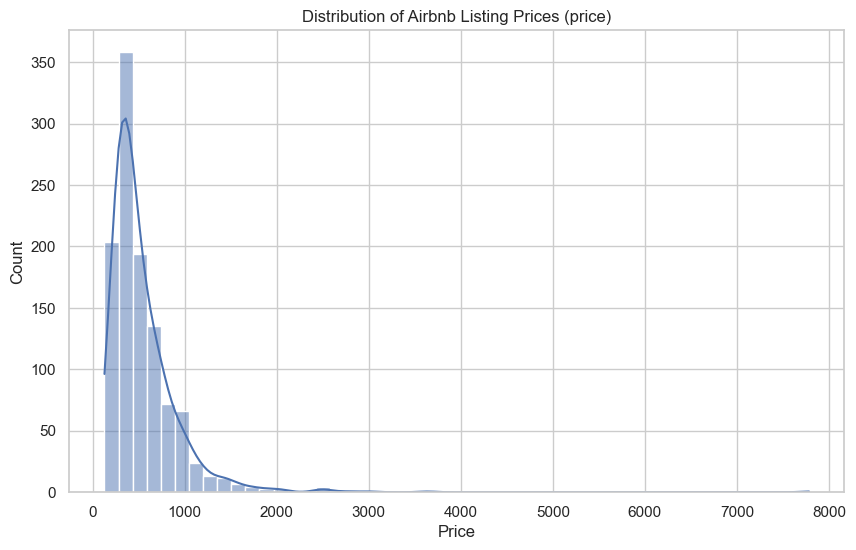

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Listing Prices (price)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

insight : Distribusi harga listing Airbnb menunjukkan bahwa sebagian besar properti memiliki harga sewa yang relatif rendah, dengan puncak frekuensi berada di kisaran 300 hingga 500.

## 4.2 Persentase Jenis Kamar pada Airbnb

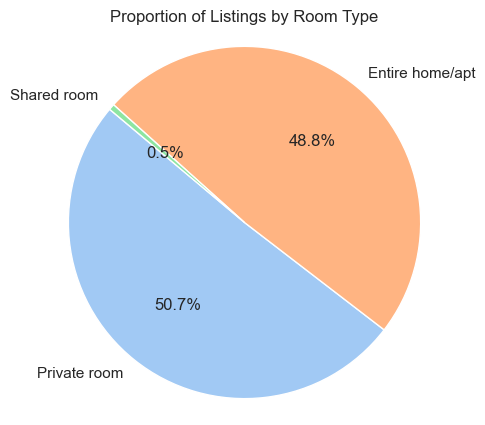

In [36]:
room_counts = data['room_type'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Listings by Room Type')
plt.axis('equal')
plt.show()

insight : Persentase room type tertinggi berada di private room sebesar 50.7%, dan shared room sebesar 0.5% yang memiliki persentase terendah. persentase private room dengan entire home/apt hanya memiliki selisih yang kecil 1.9%.

## 4.3 Perbandingan Harga Sewa Berdasarkan Tipe Kamar

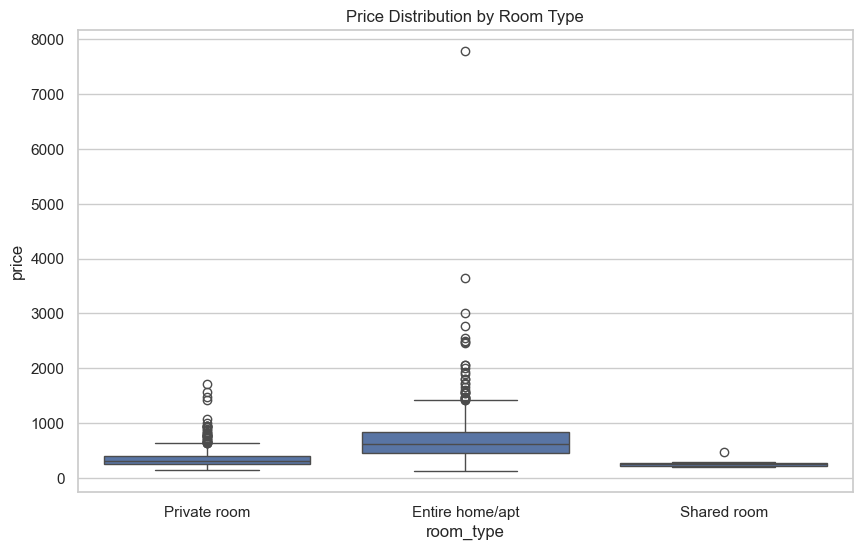

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Price Distribution by Room Type')
plt.show()

insight :
Tipe Entire home/apt memiliki rentang harga yang paling tinggi dan sebaran yang paling luas, dengan banyak outlier pada harga yang sangat tinggi, bahkan mendekati 8000. Sementara itu, Private room umumnya berada pada kisaran harga menengah, meskipun tetap memiliki sejumlah outlier yang cukup tinggi. Shared room memiliki harga paling rendah dan paling konsisten, dengan sebaran harga yang sempit dan minim outlier. 

## 4.4 Perbandingan Harga Rata-rata antara Listing Multi Kamar dan Single Kamar

C:\Users\Acer\AppData\Local\Temp\ipykernel_18476\1511608806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='multi', y='price', data=multi_price, palette='viridis')


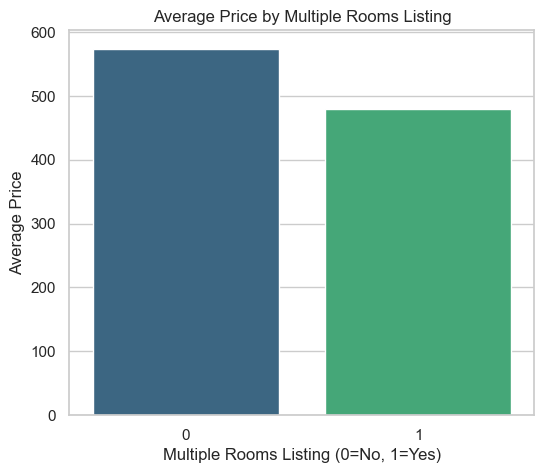

In [38]:
multi_price = data.groupby('multi')['price'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x='multi', y='price', data=multi_price, palette='viridis')
plt.title('Average Price by Multiple Rooms Listing')
plt.xlabel('Multiple Rooms Listing (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.show()

insight : Perbandingan harga rata-rata untuk listing yang memiliki multiple room lebih kecil dibanding listing yang tidak memiliki mutiple room

## 4.5 Hubungan Harga dengan Tingkat Kepuasan Tamu

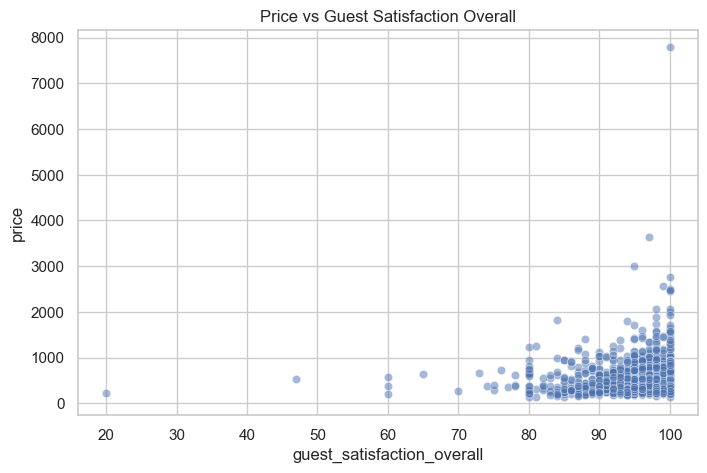

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='guest_satisfaction_overall', y='price', alpha=0.5, data=data)
plt.title('Price vs Guest Satisfaction Overall')
plt.show()

Insight : Ada tren kenaikan harga seiring dengan meningkatnya kepuasan tamu. Artinya, properti dengan rating kepuasan lebih tinggi cenderung memiliki harga yang juga lebih tinggi, meskipun hubungan ini tidak terlalu kuat. Harga murah tidak selalu berarti kualitas buruk, banyak listing murah yang tetap membuat tamu puas. Ini menunjukkan pentingnya pelayanan, kebersihan, dan akurasi deskripsi untuk mencapai kepuasan tinggi.

## 4.6 Hubungan Harga dengan Rating Kebersihan

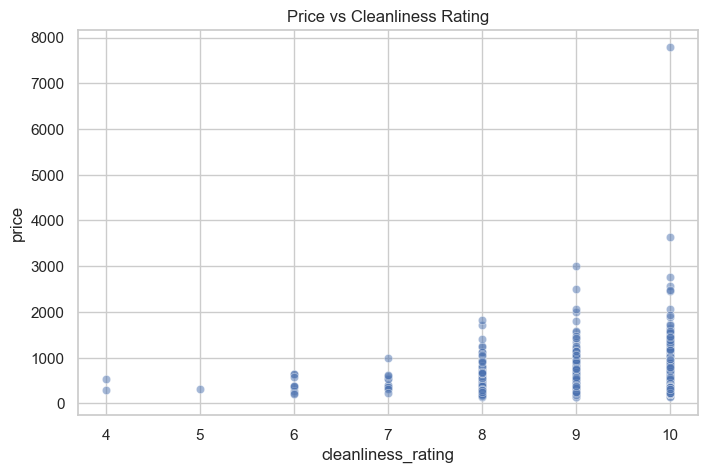

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='cleanliness_rating', y='price', alpha=0.5, data=df)
plt.title('Price vs Cleanliness Rating')
plt.show()

Insight : Terdapat hubungan positif antara rating kebersihan dan harga properti. Properti yang lebih bersih cenderung bisa memiliki harga lebih tinggi. Namun, kebersihan bukan satu-satunya faktor penentu harga, karena masih terlihat variasi harga yang lebar dalam satu rating dan faktor lain seperti lokasi, fasilitas, dan tipe akomodasi tetap berperan

## 4.7 Rata-rata Harga Sewa Airbnb Berdasarkan Jenis Kamar dan Apakah Host Superhost

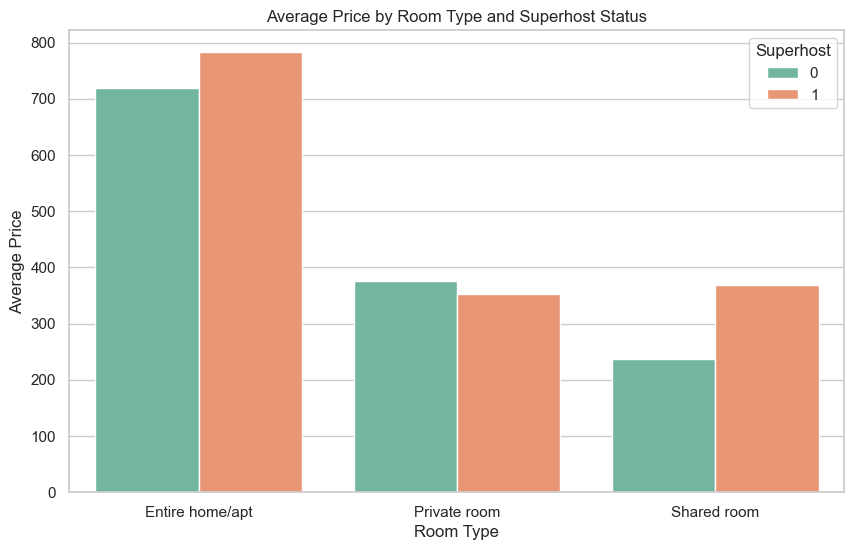

In [41]:
# Grouping data
grouped = data.groupby(['room_type', 'host_is_superhost'])['price'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='price', hue='host_is_superhost', data=grouped, palette='Set2')
plt.title('Average Price by Room Type and Superhost Status')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.legend(title='Superhost')
plt.show()

Insight:
1. Properti "Entire Home/Apt" mempunyai rata-rata harga yang paling tinggi
2. Superhost cenderung menarik harga lebih tinggi untuk shared room dan entire house/apt
3. Pengaruh superhost tidak berpengaruh pada properti "Private room" dimana harga rata-rata harga sedikit lebih rendah

## 4.8 Hubungan Korelasi di antara Variabel Numerik

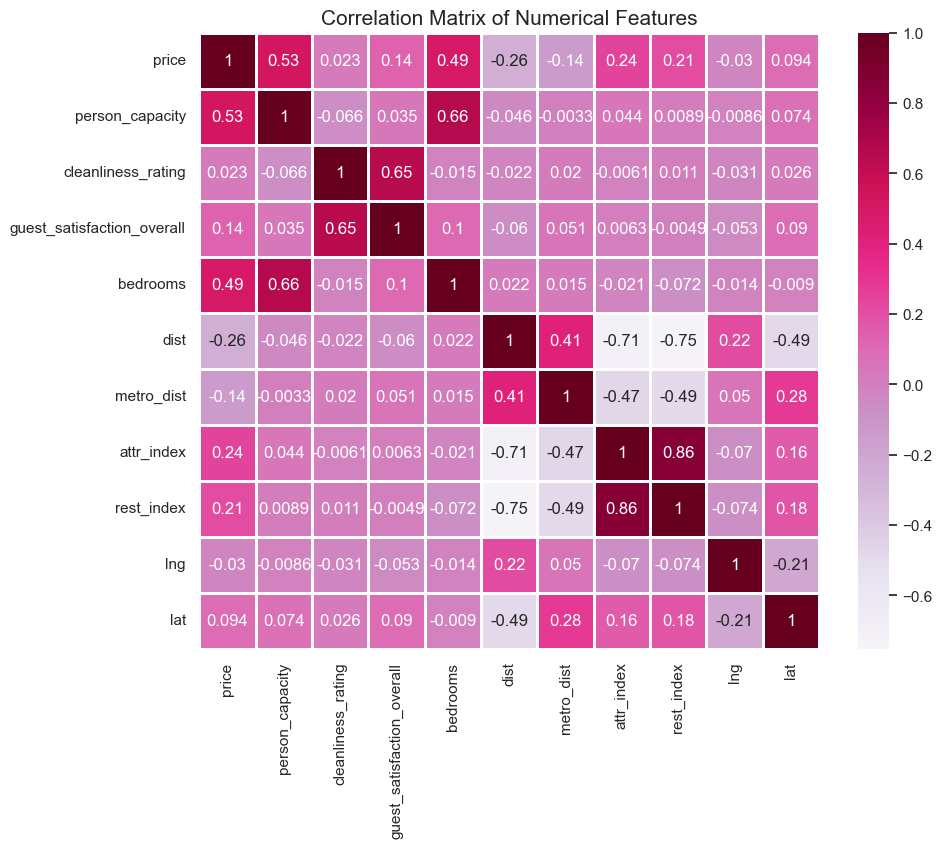

In [42]:
num_cols = ['price', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall',
            'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat']
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), cmap='PuRd', annot=True, linewidths=2)
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.show()

Insight:
1. Fitur yang Paling Berkorelasi dengan Harga (price)
    * person_capacity (0.53) : properti dengan kapasitas orang lebih besar cenderung memiliki harga lebih tinggi.

    * bedrooms (0.49) : semakin banyak kamar tidur, semakin mahal harga properti.

    * guest_satisfaction_overall (0.14) : hanya memiliki korelasi positif lemah terhadap harga.

    * cleanliness_rating (0.023) : hampir tidak berkorelasi terhadap harga.

    * dist (-0.26) : semakin jauh dari pusat, harga cenderung menurun (korelasi negatif).

2. Jika ingin menaikkan harga, strategi yang bisa dilakukan antara lain:

    * Menyediakan akomodasi dengan kapasitas besar atau lebih banyak kamar tidur.

    * Menyasar properti yang lebih dekat dengan pusat kota atau atraksi wisata.

# 5. Feature Engineering

## 5.2 Handling Cardinality
untuk mengatasi masalah yang muncul akibat fitur kategorikal, baik yang memiliki low cardinality maupun high cardinality. cardinality mengacu pada jumlah nilai unik dalam sebuah fitur

In [43]:
cat_cols = df[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']]

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,room_type,3,"[Private room, Entire home/apt, Shared room]"
1,room_shared,2,"[0, 1]"
2,room_private,2,"[1, 0]"
3,host_is_superhost,2,"[0, 1]"
4,multi,2,"[1, 0]"
5,biz,2,"[0, 1]"


Dari data diatas, terlihat bahwa semua kolom merupakan low cardinality yang artinya hanya memiliki sedikit nilai unik. maka tidak dibutuhkan handling cardinality.

## 5.3 Splitting Between Feature and Target
Pemisahan data menjadi X (features) dan y (target)
* Fitur (X): Ini adalah variabel independen atau input yang akan digunakan model untuk belajar dan membuat prediksi. 
* Target (y): Ini adalah variabel dependen atau output yang ingin diprediksi oleh model.

In [44]:
# Menghapus kolom price
X = df.drop(['price'], axis=1)

# price menjadi target
y = df[['price']]

* Train Set: Bagian dari data yang akan digunakan model untuk "belajar" dan mengidentifikasi pola hubungan antara fitur (X) dan variabel target (y).
* Test set: Bagian dari data yang akan digunakan untuk mengevaluasi kinerja model setelah dilatih. Data ini belum pernah dilihat oleh model selama proses pelatihan.

data train harus lebih banyak dibandingkan test set seperti kode dibawah ini kita mengambil test set 20% dari data asli maka train set 80% dari data asli.

In [45]:
# Membagi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (882, 18)
Test Size (221, 18)


## 5.4 Handling Missing Value
Menangani data yang hilang atau tidak tersedia di dalam dataset.

In [46]:
X_train.isnull().sum()

room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [47]:
X_test.isnull().sum()

room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [101]:
X.head()

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,Private room,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,Private room,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,Private room,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


dari data  diatas menunjukkan bahwa tidak ada missing value. maka tidak dibutuhkan handling missing value.

## 5.5 Handling Outlier

proses ini dilakukan untuk menangani outlier atau nilai ekstrim untuk meningkatkan kualitas data sebelum dilakukan modeling

In [48]:
# membuat function untuk mengecek nilai skewness
def check_skewness(df):
    list_dist = []

    for col in df.columns:
        skew_val = round(df[col].skew(), 1)

        if -0.5 <= skew_val <= 0.5:
            distribusi = 'normal'
        elif -1 <= skew_val <= 1:
            distribusi = 'moderate skewed'
        else:
            distribusi = 'highly skewed'

        list_dist.append({
            'fitur': col,
            'skewness': skew_val,
            'distribusi': distribusi
        })

    return pd.DataFrame(list_dist)

In [49]:
# memisahkan numerik dan kategorikal
num_cols = ['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall',
            'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat']
cat_cols = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']

In [50]:
# cek nilai skewness
skewness = check_skewness(df[num_cols])
skewness

,fitur,skewness,distribusi
0,person_capacity,0.9,moderate skewed
1,cleanliness_rating,-2.1,highly skewed
2,guest_satisfaction_overall,-3.4,highly skewed
3,bedrooms,1.1,highly skewed
4,dist,1.5,highly skewed
5,metro_dist,1.4,highly skewed
6,attr_index,2.1,highly skewed
7,rest_index,1.1,highly skewed
8,lng,0.3,normal
9,lat,-0.5,normal


dari hasil cek skewness, semua fitur  cenderung memiliki distribusi yang skewed kecuali fitur lng dan lat

In [51]:
# Menghitung upper boundary, lower boundary, dan persentase outliers

# Membuat list kosong
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['fitur'][row]

  # menghitung upper dan lower boundary
  if skewness['distribusi'][row] == 'highly skewed':
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 3)
    upper_boundary = df[col].quantile(0.75) + (IQR * 3)
  elif skewness['distribusi'][row] == 'moderate skewed':
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[col].quantile(0.75) + (IQR * 1.5)
  else:
    lower_boundary = df[col].mean() - 3* df[col].std()
    upper_boundary = df[col].mean() + 3* df[col].std()

  # Menambahkan ke dalam list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100))
  percent_total_outlier.append(totout)

# Membuat dataframe
outliers = pd.DataFrame({
    'column': column,

    # Membulatkan hasil
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,person_capacity,7.00,-1.00,0.00
1,cleanliness_rating,13.00,6.00,0.27
2,guest_satisfaction_overall,116.00,74.00,0.73
3,bedrooms,5.00,-2.00,0.00
4,dist,10.69,-5.74,0.73
5,metro_dist,4.65,-2.68,0.00
6,attr_index,1162.04,-647.69,0.45
7,rest_index,1386.75,-753.99,0.18
8,lng,5.01,4.77,0.18
9,lat,52.42,52.31,1.54


dari data outliers diatas dapat dilihat bahwa seluruh fitur, persentase ouliernya masih dibawah 5% dan tertinggi 1.54% (relatif rendah) maka tidak dibutuhkannya capping. mengingat ini merupakan data tentang properti, kemungkinan outlier bisa menjadi informasi penting yang merupakan properti mewah dan valid

## 5.6 Feature Selection

In [52]:
# membagi kolom numerikal dengan kategorikal
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]


In [53]:
# Melakukan feature selection unutuk kolom kategorikal dengan menggunakan kendalltau

p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = stats.kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,room_type,ada korelasi
1,room_shared,ada korelasi
2,room_private,ada korelasi
3,host_is_superhost,ada korelasi
4,multi,ada korelasi
5,biz,tidak ada korelasi


Dari kolom kategorikal, hanya ada 1 fitur yang tidak berkorelasi dengan target (price) yaitu biz maka fitur biz akan dihapus.

In [54]:
# Melakukan feature selection untuk kolom numerik dengan menggunakan spearman karena terdistribusi skewed
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = stats.spearmanr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,person_capacity,ada korelasi
1,cleanliness_rating,tidak ada korelasi
2,guest_satisfaction_overall,ada korelasi
3,bedrooms,ada korelasi
4,dist,ada korelasi
5,metro_dist,ada korelasi
6,attr_index,ada korelasi
7,rest_index,ada korelasi
8,lng,tidak ada korelasi
9,lat,ada korelasi


Dari semua fitur numerikal, fitur cleanliness_rating dan lng tidak memiliki korelasi. tapi saya hanya akan menghapus fitur cleanliness_rating dan mempertahankan fitur lng karena meskipun  tidak ada korelasi dengan target (price), lat dan lng adalah koordinat geografis yang secara bersama-sama mendefinisikan sebuah lokasi unik.

In [55]:
# Menghapus kolom cleanliness_rating dan biz
X_train.drop(['cleanliness_rating', 'biz'], axis = 1, inplace = True)
X_test.drop(['cleanliness_rating', 'biz'], axis = 1, inplace = True)
X_train

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
217,Private room,0,1,4.0,0,0,90.0,1,11.187100,0.423881,40.931415,2.167346,50.877318,3.545205,4.99213,52.29304
568,Entire home/apt,0,0,4.0,0,0,88.0,3,2.327683,0.718143,247.036456,13.080745,314.958144,21.946737,4.90155,52.35296
508,Private room,0,1,2.0,1,1,98.0,1,1.841809,0.528124,291.348599,15.427102,368.160370,25.653944,4.90276,52.35777
892,Private room,0,1,4.0,0,0,97.0,1,2.261112,1.882509,222.326535,11.772338,274.329992,19.115709,4.86146,52.36707
961,Entire home/apt,0,0,4.0,0,1,91.0,1,3.848078,1.725166,100.407806,5.316660,125.805030,8.766275,4.90817,52.40657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,Private room,0,1,2.0,0,0,100.0,1,3.330196,1.391383,136.578918,7.231944,181.518880,12.648497,4.93219,52.35525
211,Entire home/apt,0,0,4.0,1,0,98.0,2,2.859792,0.577098,167.894962,8.890150,217.442086,15.151677,4.91900,52.35300
502,Entire home/apt,0,0,3.0,1,0,98.0,2,0.691933,0.808129,1029.727093,54.524734,689.889401,48.072486,4.88400,52.37600
537,Entire home/apt,0,0,2.0,0,0,96.0,1,3.134615,1.954981,138.350098,7.325730,183.169158,12.763490,4.93648,52.36381


## 5.7 Preprocessing Pipeline
Menyiapkan data seperti melakukan scalling terhadap fitur numerik dan melakukan encodin untuk fitur kategorikal. ColumnTransformer ini digunakan untuk menerapkan transformasi spesifik pada tipe kolom berbeda, kolom numerik yang perlu di-scale dengan MinMaxScaler (karena distribusinya skewed) dan kolom kategorikal yang perlu di-encode dengan OneHotEncoder.

In [56]:
# membagi fitur numerik dan kategorikal setelah feature selection
num = ['person_capacity', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat']
cat = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi']

In [57]:
# Membuat column transformer untuk preprocessing
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), num),
    ('encoding', OneHotEncoder(), cat)
], remainder='passthrough')

# 6. Model Definition
Memilih algoritma machine learning tertentu yang akan digunakan untuk memecahkan masalah, serta menginisialisasi model tersebut dengan parameter defaultnya. Disini digunakan pipeline untuk mencegah  data leakage dan meringkas proses.

In [58]:
# Membuat pipeline untuk Random Forest 
pipe_rf = Pipeline([
('transformer', transformer),
('rf', RandomForestRegressor())
])

# Membuat pipeline untuk model decision tree
pipe_dt = Pipeline([
('transformer', transformer),
('dt', DecisionTreeRegressor())
])

# Membuat pipeline untuk model svr
pipe_svr = Pipeline([
('transformer', transformer),
('svr', SVR())
])

# Membuat pipeline untuk model K Neighbors
pipe_knr = Pipeline([
('transformer', transformer),
('knr', KNeighborsRegressor())
])

# Membuat pipeline untuk model XGBoost
pipe_xg = Pipeline([
('transformer', transformer),
('xg', XGBRegressor())
])


# 7. Model Training & Model Evaluation
Model training : membuat model "belajar" dari data, yaitu menemukan pola dan hubungan antara fitur-fitur input dan variabel target yang ingin diprediksi

Model Evaluation : mengukur seberapa baik kinerja model yang telah dilatih pada data yang belum pernah dilihat sebelumnya, dan menilai kemampuannya untuk bergeneralisasi

##  7.1 Model KNeighborsRegressor

1. Kelebihan:
    * Konsepnya mudah dipahami dengan memprediksi berdasarkan rata-rata nilai tetangga terdekat
    * Non-parametrik: tidak mengasumsikan bentuk distribusi data
    * Cocok untuk data yang tidak memiliki hubungan linear
2. Kekurangan:
    * Untuk setiap prediksi baru, perlu menghitung jarak ke setiap titik data di dataset pelatihan yang dapat sangat lambat untuk dataset besar
    * Sensitif terhadap outlier
    * Sensitif terhadap skala data (perlu scaling)


In [59]:
# Melatih model KNeighbors Regressor
pipe_knr.fit(X_train, y_train)

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['person_capacity',
                                                   'guest_satisfaction_overall',
                                                   'bedrooms', 'dist',
                                                   'metro_dist', 'attr_index',
                                                   'rest_index', 'lng',
                                                   'lat']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['room_type', 'room_shared',
                                                   'room_private',
                                                   'host_is_superhost',
                                                   'multi'])])),
                ('knr', KNeighborsRegressor())])

In [60]:
# memprediksi nilai target dari data latih dan data test menggunakan model KNeighbors Regressor
y_knr_pred_train = pipe_knr.predict(X_train)
y_knr_pred_test = pipe_knr.predict(X_test)
y_knr_pred_test

array([[ 948.74979495],
       [ 501.90987275],
       [ 285.09830572],
       [ 267.71026176],
       [ 222.52946828],
       [ 390.31706231],
       [ 268.13207415],
       [ 757.48131137],
       [ 333.84107047],
       [ 261.47681204],
       [ 896.11698264],
       [ 261.05499965],
       [ 302.58008577],
       [ 840.15653926],
       [ 634.12462213],
       [ 579.8514283 ],
       [ 269.63185152],
       [ 460.61912685],
       [ 772.61968926],
       [ 792.63234364],
       [ 515.31413306],
       [ 487.61511963],
       [ 236.26180489],
       [1184.35544724],
       [ 773.97886251],
       [ 823.4246479 ],
       [ 231.10632016],
       [ 961.82597896],
       [ 695.52175849],
       [1022.56696272],
       [ 347.57340707],
       [ 659.24589319],
       [ 766.76118389],
       [ 266.02301221],
       [ 324.37372578],
       [ 579.8514283 ],
       [ 781.66522157],
       [ 511.0022731 ],
       [ 680.00843625],
       [ 677.89937431],
       [ 955.54566119],
       [ 596.302

In [61]:
print('Nilai MAE Train KNeighborsRegressor : ', mean_absolute_error(y_train, y_knr_pred_train))
print('Nilai MAE Test KNeighborsRegressor : ', mean_absolute_error(y_test, y_knr_pred_test))
print()
print('Nilai R-Squared Train KNeighborsRegressor : ', r2_score(y_train, y_knr_pred_train))
print('Nilai R-Squared Test KNeighborsRegressor : ', r2_score(y_test, y_knr_pred_test))

Nilai MAE Train KNeighborsRegressor :  157.75682319264578
Nilai MAE Test KNeighborsRegressor :  186.80011405264045

Nilai R-Squared Train KNeighborsRegressor :  0.47004736353559085
Nilai R-Squared Test KNeighborsRegressor :  0.13988764469862558


1. MAE : Ada perbedaan yang cukup signifikan, menunjukkan adanya overfitting. Model bekerja lebih baik pada data yang sudah dilihatnya dibandingkan data baru.
2. R-Squared : R-Squared train dan test yang rendah menunjukkan underfitting (model tidak cukup kuat untuk menangkap pola dalam data, atau terlalu sederhana). selisih terhadap train dan test juga besar  juga mengindikasi adanya overfitting.

In [62]:
# Cross Validation
validation_KNR = cross_val_score(pipe_knr,
                                X_train,
                                y_train,
                                cv = 5,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean (KNR)               :', validation_KNR.mean())
print('MAE - Std Dev (KNR)            :', validation_KNR.std())

MAE - Mean (KNR)               : -203.01065221311106
MAE - Std Dev (KNR)            : 16.45731907192925


1. Rata-rata kesalahan prediksi model KNR adalah sekitar 203.01 Euro dari nilai sebenarnya.
2. Standar deviasi yang lebih rendah menunjukkan bahwa model memiliki kinerja yang lebih konsisten. Standar deviasi 16.45 relatif tinggi.

## 7.2 Model Desicion Tree
1. Kelebihan : 
    * Mudah dipahami dan dapat divisualisasikan
    * Tidak memerlukan feature scaling
    * Cocok untuk data yang tidak memiliki hubungan linear
    * Dapat menangani fitur numerik dan kategorikal

2. Kekurangan :
    * Sangat Rentan terhadap overfitting
    * Perubahan kecil dalam data pelatihan dapat menghasilkan pohon yang sangat berbeda
    * Kurang stabil dibanding ensemble model seperti Random Forest

In [63]:
# Melatih model Desicion Tree
pipe_dt.fit(X_train, y_train)

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['person_capacity',
                                                   'guest_satisfaction_overall',
                                                   'bedrooms', 'dist',
                                                   'metro_dist', 'attr_index',
                                                   'rest_index', 'lng',
                                                   'lat']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['room_type', 'room_shared',
                                                   'room_private',
                                                   'host_is_superhost',
                                                   'multi'])])),
                ('dt', DecisionTreeRegressor())])

In [64]:
# memprediksi nilai target dari data latih dan data test menggunakan model Decision Tree Regressor
y_dt_pred_train = pipe_dt.predict(X_train)
y_dt_pred_test = pipe_dt.predict(X_test)
y_dt_pred_test

array([1413.30583741,  607.17549739,  277.92749514,  268.0852061 ,
        283.78600052,  282.84863966,  276.28711363,  326.67025988,
        325.49855881,  251.91573126,  737.23431678,  725.04862559,
        258.24291707,  636.70236449,  319.64005343, 1425.72586882,
        304.87661988,  300.89283622,  531.95228833,  685.91380967,
        378.69378764,  372.36660183,  194.03369812,  786.44576196,
        814.56658777,  387.13003539,  393.45722119,  568.97804232,
        368.61715839,  694.58439763,  356.4314672 ,  774.26007077,
        497.50427671,  282.84863966,  245.58854545, 1019.84861622,
        467.04004874,  313.31286762,  326.67025988,  422.74974808,
        792.77294777,  722.23654301,  373.53830291,  497.50427671,
        516.0171537 ,  313.54720784,  737.23431678,  571.55578469,
       3637.66315937,  968.29376889,  381.03718979,  761.84003937,
        320.81175451,  288.70714503,  974.6209547 ,  675.6028402 ,
       1210.36721112,  288.70714503,  940.17294308,  405.64291

In [65]:
print('Nilai MAE Train Desicion Tree : ', mean_absolute_error(y_train, y_dt_pred_train))
print('Nilai MAE Test Desicion Tree : ', mean_absolute_error(y_test, y_dt_pred_test))
print()
print('Nilai R-Squared Train Desicion Tree : ', r2_score(y_train, y_dt_pred_train))
print('Nilai R-Squared Test Desicion Tree : ', r2_score(y_test, y_dt_pred_test))

Nilai MAE Train Desicion Tree :  0.0
Nilai MAE Test Desicion Tree :  207.8756762597351

Nilai R-Squared Train Desicion Tree :  1.0
Nilai R-Squared Test Desicion Tree :  -0.5267858995550876


1. Nilai MAE train set sangat sempurna artinya tidak ada error sama sekali tapi pada test set memiliki nilai MAE yang sangat tinggi ini mengartikan bahwa model Desicion Tree sangat Overfit dimana model ini sangat menghafal pola pada train set.
2. nilai r2 juga mengindikasi adanya overfit yang parah karena nilai r2 yang sempurna di train set dan di test set nilai r2 negatif artinya model menjelaskan lebih buruk daripada tebakan rata-rata di data uji.

In [66]:
validation_DT = cross_val_score(pipe_dt,
                                X_train,
                                y_train,
                                cv = 5,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean (Desicion Tree)               :', validation_DT.mean())
print('MAE - Std Dev (Desicion Tree)            :', validation_DT.std())

MAE - Mean (Desicion Tree)               : -228.58590057131232
MAE - Std Dev (Desicion Tree)            : 34.47325157845605


1. secara rata-rata di berbagai fold cross-validation, memiliki kesalahan prediksi sebesar sekitar 206.90. Ini berarti, rata-rata, harga yang diprediksi oleh model meleset dari harga sebenarnya sebesar 206.9 kesalahan prediksi Decision Tree sangat besar.
2. Standar deviasi sebesar 30.13 termasuk sangat tiggi. maka ini adalah indikasi bahwa kinerja Decision Tree sangat tidak stabil dan tidak konsisten

## 7.3 Model Random Forest
1. Kelebihan : 
    *  Akurasi tinggi memberikan kinerja yang sangat baik dan akurat
    * Lebih tahan terhadap outlier dan noise
    * cenderung tidak mudah overfit
2. Kekurangan : 
    *  Random Forest secara keseluruhan masih dianggap "black box" dan sulit untuk memahami bagaimana keputusan akhir dibuat
    * Melatih banyak pohon membutuhkan lebih banyak waktu dan memori

In [67]:
pipe_rf.fit(X_train, y_train)

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['person_capacity',
                                                   'guest_satisfaction_overall',
                                                   'bedrooms', 'dist',
                                                   'metro_dist', 'attr_index',
                                                   'rest_index', 'lng',
                                                   'lat']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['room_type', 'room_shared',
                                                   'room_private',
                                                   'host_is_superhost',
                                                   'multi'])])),
                ('rf', RandomForestRegressor())])

In [68]:
# memprediksi nilai target dari data latih dan data test menggunakan model Random Forest Regressor
y_rf_pred_train = pipe_rf.predict(X_train)
y_rf_pred_test = pipe_rf.predict(X_test)
y_rf_pred_test

array([ 806.00379631,  586.23251236,  295.91545005,  277.93452534,
        226.93975113,  272.25177513,  240.59475547,  649.25362641,
        284.87333911,  271.17381014,  819.35884517,  555.60658965,
        320.52585944,  696.6278443 ,  348.52482835,  951.49626227,
        406.5357486 ,  290.58889696,  556.12916833,  915.51332224,
        397.34023856,  454.94575024,  237.72877464,  863.35856396,
        715.86951937,  382.41042345,  286.97302744,  525.19860333,
        564.80678649,  827.85367797,  389.77339301,  764.58416329,
        469.84510112,  269.11161624,  237.26946781,  972.65249689,
        641.98204954,  380.20293863,  565.22859888,  554.66922879,
        830.85791953,  814.8103016 ,  322.12171631,  463.34450355,
       1062.4212031 ,  447.65542615,  703.4893258 ,  768.12738734,
       1223.63086729,  966.24797882,  428.92929956,  810.0203876 ,
        268.6312188 ,  297.63550723,  900.96548169,  690.54905912,
        680.62006421,  349.80666932,  731.65701966,  414.09790

In [69]:
print('Nilai MAE Train Random Forest : ', mean_absolute_error(y_train, y_rf_pred_train))
print('Nilai MAE Test Random Forest : ', mean_absolute_error(y_test, y_rf_pred_test))
print()
print('Nilai R-Squared Train Random Forest : ', r2_score(y_train, y_rf_pred_train))
print('Nilai R-Squared Test Random Forest : ', r2_score(y_test, y_rf_pred_test))

Nilai MAE Train Random Forest :  58.0393067716936
Nilai MAE Test Random Forest :  137.495590215522

Nilai R-Squared Train Random Forest :  0.8949345756541915
Nilai R-Squared Test Random Forest :  0.4979604279172929


1. Nilai MAE pada train sangat kecil yaitu 59.28 tapi nilai MAE pada Test 140.75 maka terdapat selisih yang signifikan artinya model random forest termasuk overfit
2. Model menjelaskan 88% variasi harga pada train set tapi hanya menjelaskan 49% variasi harga  pada test set artinya Random forest belajar dengan baik di data latih, tapi tidak cukup mampu mempertahankan performa itu saat diuji dengan data baru atau overfit.

In [70]:
validation_RF = cross_val_score(pipe_rf,
                                X_train,
                                y_train,
                                cv = 5,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean (Random Forest)               :', validation_RF.mean())
print('MAE - Std Dev (Random Forest)            :', validation_RF.std())

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

MAE - Mean (Random Forest)               : -160.58094935794813
MAE - Std Dev (Random Forest)            : 6.650608168941946


1. rata-rata kesalahan prediksi Random Forest sekitar 158.47, yang merupakan kinerja terbaik (paling kecil nilai MAE) di antara model-model lainnya.
2. Standar deviasi = 6.42 termasuk rendah dan ini adalah indikator yang sangat baik. ARtinya kinerja model Random Forest sangat konsisten dan stabil di berbagai fold cross-validation

## 7.4 Model SVR

1. Kelebihan :
    * Bekerja sangat baik di dataset dengan banyak fitur
    * Mampu memodelkan hubungan non-linier menggunakan berbagai fungsi kernel
    * Fokus pada margin dan support vectors membuatnya kurang sensitif terhadap outlier
2. Kekurangan : 
    * Sensitif terhadap feature scaling
    * Pelatihan bisa sangat lambat untuk dataset yang besar karena kompleksitas tinggi
    * Sulit di-tuning, terutama dalam memilih kernel dan parameter seperti C, epsilon, dan gamma

In [71]:
# Melatih Model SVR
pipe_svr.fit(X_train, y_train)

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['person_capacity',
                                                   'guest_satisfaction_overall',
                                                   'bedrooms', 'dist',
                                                   'metro_dist', 'attr_index',
                                                   'rest_index', 'lng',
                                                   'lat']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['room_type', 'room_shared',
                                                   'room_private',
                                                   'host_is_superhost',
                                                   'multi'])])),
                ('svr', SVR())])

In [72]:
y_svr_pred_train = pipe_svr.predict(X_train)
y_svr_pred_test = pipe_svr.predict(X_test)
y_svr_pred_test

array([431.08282977, 448.84198904, 391.07888292, 397.13192483,
       387.91887242, 408.0203331 , 383.37600252, 391.49347917,
       419.38996641, 403.31048662, 456.39395191, 385.05047084,
       408.4889357 , 444.33871077, 423.13300143, 453.24370553,
       386.74693945, 406.89782696, 450.69222943, 411.54905413,
       460.38591995, 419.70209618, 386.77955743, 462.54021232,
       428.60728411, 455.93856254, 387.0910461 , 449.87625451,
       429.84482031, 445.89436775, 440.1016029 , 405.94801102,
       431.44786121, 406.33820591, 386.64668054, 453.67777533,
       455.80501785, 456.64307392, 390.83883799, 444.1847481 ,
       429.20703128, 440.98655353, 393.34886573, 415.47785566,
       456.73760753, 460.99963048, 416.49901501, 413.33030978,
       421.58695373, 399.71628489, 402.92600796, 451.42738849,
       409.47704181, 436.7684966 , 463.68680029, 462.29995164,
       388.18479775, 388.70706395, 383.87025139, 407.72561141,
       385.83939571, 397.98601947, 440.92033189, 451.52

In [73]:
print('Nilai MAE Train SVR : ', mean_absolute_error(y_train, y_svr_pred_train))
print('Nilai MAE Test SVR : ', mean_absolute_error(y_test, y_svr_pred_test))
print()
print('Nilai R-Squared Train SVR : ', r2_score(y_train, y_svr_pred_train))
print('Nilai R-Squared Test SVR : ', r2_score(y_test, y_svr_pred_test))

Nilai MAE Train SVR :  230.87411414194224
Nilai MAE Test SVR :  222.217796776614

Nilai R-Squared Train SVR :  -0.05673223552882867
Nilai R-Squared Test SVR :  -0.06356493454201906


1. Nilai MAE yang sangat tinggi menunjukkan bahwa model SVR memiliki kesalahan prediksi rata-rata yang sangat besar. Prediksi model jauh dari nilai sebenarnya.
2. Nilai R2 negatif pada Train dan Test menunjukkan bahwa model gagal total menangkap pola data. maka model SVR sangat tidak cocok dengan dataset ini.

In [74]:
validation_SVR = cross_val_score(pipe_svr,
                                X_train,
                                y_train,
                                cv = 5,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean SVR               :', validation_SVR.mean())
print('MAE - Std Dev SVR            :', validation_SVR.std())

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE - Mean SVR               : -231.65818315292967
MAE - Std Dev SVR            : 21.91574336993755


c:\Users\Acer\miniconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1. memiliki nilai rata rata MAE yang tertinggi dibandingkan model lainnya ini mengindikasi bahwa model ini sangat tidak akurat dalam memprediksi nilai target pada data yang belum pernah dilihat
2. Standar deviasi ini juga relatif tinggi, menunjukkan bahwa kinerja SVR tidak stabil

## 7.5 Model XGBoost
XGBoost dipilih dibanding model boosting lain seperti LightGBM dan CatBoost karena lebih stabil dan andal di dataset kecil (-+1000 baris), memberikan akurasi tinggi tanpa terlalu bergantung pada tuning parameter.

1. Kelebihan : 
    * Mengatasi overfitting dengan regularisasi (L1 dan L2)
    *  Dapat menangani missing values secara internal
    * Dioptimalkan untuk kecepatan dan efisiensi, mampu menangani dataset besar
2. Kekurangan :
    * Rentan terhadap Overfitting
    * Memiliki banyak hyperparameter yang perlu di-tuning secara cermat, membuat proses tuning bisa rumit dan memakan waktu.
    * Membutuhkan waktu pelatihan lebih lama dibanding model sederhana


In [75]:
pipe_xg.fit(X_train, y_train)

c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['person_capacity',
                                                   'guest_satisfaction_overall',
                                                   'bedrooms', 'dist',
                                                   'metro_dist', 'attr_index',
                                                   'rest_index', 'lng',
                                                   'lat']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['room_type', 'room_shared',
                                                   'room_private',
                                                   'host_is_superhost',
                                                   'multi'])])),
                ('xg',
                 XGBRegress...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [76]:
y_xg_pred_train = pipe_xg.predict(X_train)
y_xg_pred_test = pipe_xg.predict(X_test)
y_xg_pred_test

array([ 931.4707 ,  509.20038,  281.918  ,  295.8735 ,  208.67975,
        235.12283,  215.69194,  555.72504,  326.72842,  291.92325,
        825.1977 ,  459.1298 ,  357.25574,  973.8803 ,  305.00772,
        869.2261 ,  356.00366,  300.37772,  489.41867,  709.618  ,
        349.91122,  585.4371 ,  195.9384 ,  842.20996,  629.4293 ,
        381.8132 ,  250.46822,  538.8905 ,  466.90366,  773.745  ,
        319.43637,  745.4354 ,  462.41882,  253.07571,  222.359  ,
       1005.1082 ,  727.51794,  366.607  ,  546.6965 ,  533.5289 ,
        901.24915,  649.2115 ,  297.84937,  392.67126,  974.7116 ,
        470.27365,  763.18207,  672.8384 , 1580.4211 ,  967.356  ,
        437.9591 ,  738.20844,  250.78981,  218.96628, 1051.098  ,
        681.802  ,  652.1055 ,  339.19205,  663.6079 ,  410.2363 ,
        341.22244,  581.3039 ,  226.99821,  546.80554, 1135.0317 ,
       1518.0541 ,  502.4821 ,  238.36713,  499.49387,  207.9545 ,
        209.00288,  298.21442,  298.2426 ,  681.3316 ,  221.75

In [77]:
print('Nilai MAE Train XGBoost : ', mean_absolute_error(y_train, y_xg_pred_train))
print('Nilai MAE Test XGBoost: ', mean_absolute_error(y_test, y_xg_pred_test))
print()
print('Nilai R-Squared Train XGBoost : ', r2_score(y_train, y_xg_pred_train))
print('Nilai R-Squared Test XGBoost : ', r2_score(y_test, y_xg_pred_test))

Nilai MAE Train XGBoost :  10.67298698425293
Nilai MAE Test XGBoost:  148.242431640625

Nilai R-Squared Train XGBoost :  0.998767614364624
Nilai R-Squared Test XGBoost :  0.4562881588935852


In [78]:
validation_XG = cross_val_score(pipe_xg,
                                X_train,
                                y_train,
                                cv = 5,
                                scoring = 'neg_mean_absolute_error')

print('MAE - Mean XGBoost               :', validation_XG.mean())
print('MAE - Std Dev XGBoost            :', validation_XG.std())

MAE - Mean XGBoost               : -183.97694396972656
MAE - Std Dev XGBoost            : 18.219619495196156


1. rata-rata MAE cukup tinggi = 183.97 artinya model prediksi tidak cukup akurat secara rata-rata
2. Standar deviasi yang tinggi (18.22) ini menunjukkan bahwa kinerja XGBoost tidak konsisten dan tidak stabil di antara 5 fold cross-validation

In [79]:
models = {
    'KNeighbors' : pipe_knr,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'SVR' : pipe_svr,
    'XGBoost' : pipe_xg
}

metrics = {
    'MAE' : mean_absolute_error,
}

df_model = pd.DataFrame(index=['MAE Train', 'MAE Test', 'R2 Train', 'R2 Test'], columns=models.keys())

for name, model in models.items():
    df_model.loc['MAE Train', name] = mean_absolute_error(y_train, model.predict(X_train))
    df_model.loc['MAE Test', name] = mean_absolute_error(y_test, model.predict(X_test))
    df_model.loc['R2 Train',name] = r2_score(y_train, model.predict(X_train))
    df_model.loc['R2 Test',name] = r2_score(y_test, model.predict(X_test))

In [80]:
df_model

,KNeighbors,Decision Tree,Random Forest,SVR,XGBoost
MAE Train,157.756823,0.0,58.039307,230.874114,10.672987
MAE Test,186.800114,207.875676,137.49559,222.217797,148.242432
R2 Train,0.470047,1.0,0.894935,-0.056732,0.998768
R2 Test,0.139888,-0.526786,0.49796,-0.063565,0.456288


Berdasarkan metrik MAE (yang harusnya paling rendah mendekati 0) dan R2 (yang harusnya paling tinggi jauh dari 0) pada data yang belum pernah dilihat model, model terbaik berada  di:

**1. Random Forest**

Meskipun semua model (kecuali SVR) menunjukkan beberapa tingkat overfitting (MAE Train jauh lebih rendah daripada MAE Test, dan R2 Train jauh lebih tinggi daripada R2 Test), Random Forest berhasil memberikan keseimbangan terbaik antara data pelatihan dan kemampuan generalisasi pada data pengujian. Meskipun ada overfitting, selisih antara metrik train dan test-nya relatif lebih kecil dibandingkan dengan XGBoost dan Decision Tree yang menunjukkan overfitting ekstrem. Ini menunjukkan bahwa Random Forest lebih baik dalam belajar.

MAE Test terendah (140.17)
R2 Test tertinggi (0.4880)
Ini berarti model Random Forest saat ini menunjukkan kemampuan prediksi yang paling baik pada data baru dengan kesalahan rata-rata terkecil.

Berdasarkan hasil cross validation, model Random Forest memiliki kinerja model Random Forest sangat konsisten dan stabil dan menunjukkan rata-rata MAE yang paling kecil dibandingkan model lainnya

**2. XGBoost**

XGBoost menempati posisi terbaik kedua karena kinerja test-nya yang relatif kompetitif (mendekati Random Forest) dan potensinya yang sangat besar untuk ditingkatkan. Meskipun MAE Test XGBoost sedikit lebih tinggi dari Random Forest, perbedaannya relatif kecil, sekitar 8. Ini menunjukkan bahwa, terlepas dari overfitting pada data train karena selisih yang signikan antara train dan test dan juga nilai metrik MAE train yang paling kecil dan R2 paling besar (hampir sempurna) menandakan bahwa model ini sangat menghafal pola, namun XGBoost masih mampu menghasilkan prediksi yang cukup baik pada data baru.



## Hyperparameter Tuning
Proses mencari kombinasi parameter terbaik untuk mengoptimalkan kinerja model machine learning. model yang akan dicoba untuk di hyperparameter tuning adalah 2 model terbaik dengan parameter default yaitu model random forest dan XGBoost

### Random Forest

In [81]:
# membuat dictionary berisi kumpulan hyperparameter yang di set secara manual.
random_search_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}
random_search_params


{'rf__n_estimators': [100, 200, 300],
 'rf__max_depth': [None, 10, 20],
 'rf__min_samples_split': [2, 5, 10],
 'rf__min_samples_leaf': [1, 2, 4],
 'rf__bootstrap': [True, False]}

In [82]:
# hyperparameter tuning Random Forest dengan RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=random_search_params,
    n_iter=30,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_absolute_error'
)

#  melatih model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Acer\miniconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['person_capacity',
                                                                                'guest_satisfaction_overall',
                                                                                'bedrooms',
                                                                                'dist',
                                                                                'metro_dist',
                                                                                'attr_index',
                                                                                'rest_index',
                                                                                'lng',
                                                                                'lat']),
                                                                              ('encoding',
                                                                               OneHotEncoder(),
                                                                               ['room_type',
                                                                                'room_shared',
                                                                                'room_private',
                                                                                'host_is_superhost',
                                                                                'multi'])])),
                                             ('rf', RandomForestRegressor())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': [None, 10, 20],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [83]:
# Mencari hyperparameter terbaik
random_search.best_params_

{'rf__n_estimators': 200,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 4,
 'rf__max_depth': None,
 'rf__bootstrap': True}

In [84]:
# Mencari estimator terbaik
random_search_best = random_search.best_estimator_

In [85]:
# Prediksi model Random Forest dengan hyperparameter tuning pada data latih dan data test
y_pred_train_random = random_search_best.predict(X_train)
y_pred_test_random = random_search_best.predict(X_test)

In [86]:
# Mencetak nilai MAE dan R-Squared
print('Nilai MAE Train : ', mean_absolute_error(y_train, y_pred_train_random))
print('Nilai MAE Test: ', mean_absolute_error(y_test, y_pred_test_random))

print('Nilai R-Squared Train : ', r2_score(y_train, y_pred_train_random))
print('Nilai R-Squared Test: ', r2_score(y_test, y_pred_test_random))

Nilai MAE Train :  95.92882572011828
Nilai MAE Test:  139.00102748896902
Nilai R-Squared Train :  0.6664564349670795
Nilai R-Squared Test:  0.46778266790197


1. Nilai MAE pada train cukup kecil yaitu 98.87 artinya data latih cukup baik untuk mempelajari tapi nilai MAE pada Test 136.42 maka terdapat selisih yang signifikan artinya model random forest termasuk overfit (terlalu menghafal pola)
2. Model menjelaskan 64% variasi harga pada train set tapi hanya menjelaskan 50% variasi harga pada test set artinya performa di data uji masih stabil dan tidak jauh drop dari training. Model ini termasuk overfit karena mengalami penurunan yang signifikan

In [87]:
rf_comparison = pd.DataFrame({
    'Metric': ['MAE Train', 'MAE Test', 'R2 Train', 'R2 Test'],
    'Random Forest (Before Tuning)': [mean_absolute_error(y_train, y_rf_pred_train), mean_absolute_error(y_test, y_rf_pred_test), r2_score(y_train, y_rf_pred_train), r2_score(y_test, y_rf_pred_test)],
    'Random Forest (After Tuning)': [mean_absolute_error(y_train, y_pred_train_random), mean_absolute_error(y_test, y_pred_test_random), r2_score(y_train, y_pred_train_random), r2_score(y_test, y_pred_test_random)]
})
rf_comparison

,Metric,Random Forest (Before Tuning),Random Forest (After Tuning)
0,MAE Train,58.039307,95.928826
1,MAE Test,137.495590,139.001027
2,R2 Train,0.894935,0.666456
3,R2 Test,0.497960,0.467783


Model setelah tuning lebih seimbang dan lebih general meskipun MAE dan R² pada train sedikit turun.

Model sebelum tuning terlalu bagus di data latih (train R² tinggi, MAE rendah), tapi turun cukup jauh di test, indikasi overfitting.

Oleh karena itu, model random forest setelah tuning lebih bagus karena performa di test lebih baik dan stabil.

### XGBoost

In [88]:
# membuat dictionary berisi kumpulan hyperparameter yang di set secara manual.
xg_search_params = {
    'xg__n_estimators': [100, 200, 300],
    'xg__max_depth': [3, 5, 7, 10],
    'xg__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xg__subsample': [0.6, 0.8, 1.0],
    'xg__colsample_bytree': [0.6, 0.8, 1.0],
    'xg__reg_alpha': [0, 0.1, 0.5],
    'xg__reg_lambda': [1, 1.5, 2]
}
xg_search_params

{'xg__n_estimators': [100, 200, 300],
 'xg__max_depth': [3, 5, 7, 10],
 'xg__learning_rate': [0.01, 0.05, 0.1, 0.2],
 'xg__subsample': [0.6, 0.8, 1.0],
 'xg__colsample_bytree': [0.6, 0.8, 1.0],
 'xg__reg_alpha': [0, 0.1, 0.5],
 'xg__reg_lambda': [1, 1.5, 2]}

In [89]:
# hyperparameter tuning XGBoost dengan RandomizedSearchCV
random_search_xg = RandomizedSearchCV(estimator=pipe_xg,
                                   param_distributions=xg_search_params,
                                   n_iter=30,           # jumlah kombinasi yang dicoba
                                   cv=5,                # 5-fold cross validation
                                   scoring='neg_mean_absolute_error',
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Melatih model XGBoost dengan beberapa kombinasi hyperparameter berbeda
random_search_xg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Acer\miniconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['person_capacity',
                                                                                'guest_satisfaction_overall',
                                                                                'bedrooms',
                                                                                'dist',
                                                                                'metro_dist',
                                                                                'attr_index',
                                                                                'rest_index',
                                                                                'lng',
                                                                                'lat']),
                                                                              ('encoding',
                                                                               OneHotEncoder(),
                                                                               ['room_type',
                                                                                'room_shared',
                                                                                'room_private',
                                                                                'host_is_superh...
                                                           random_state=None, ...))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'xg__colsample_bytree': [0.6, 0.8, 1.0],
                                        'xg__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'xg__max_depth': [3, 5, 7, 10],
                                        'xg__n_estimators': [100, 200, 300],
                                        'xg__reg_alpha': [0, 0.1, 0.5],
                                        'xg__reg_lambda': [1, 1.5, 2],
                                        'xg__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [90]:
# koombinasi hyperparameter terbaik
random_search_xg.best_params_

{'xg__subsample': 0.6,
 'xg__reg_lambda': 1.5,
 'xg__reg_alpha': 0,
 'xg__n_estimators': 300,
 'xg__max_depth': 7,
 'xg__learning_rate': 0.01,
 'xg__colsample_bytree': 0.8}

In [91]:
# Mendapatkan estimator terbaik
random_search_xg_best = random_search_xg.best_estimator_

In [92]:
# Memprediksi hasil dengan data latih dan data test model XGBoost dengan hyperparameter terbaik
y_pred_train_xg_random = random_search_xg_best.predict(X_train)
y_pred_test_xg_random = random_search_xg_best.predict(X_test)

In [93]:
# Cek nilai MAE dan R-Squared
print('Nilai MAE Train : ', mean_absolute_error(y_train, y_pred_train_xg_random))
print('Nilai MAE Test: ', mean_absolute_error(y_test, y_pred_test_xg_random))
print('Nilai R-Squared Train : ', r2_score(y_train, y_pred_train_xg_random))
print('Nilai R-Squared Test: ', r2_score(y_test, y_pred_test_xg_random))

Nilai MAE Train :  78.9097900390625
Nilai MAE Test:  133.09776306152344
Nilai R-Squared Train :  0.831755518913269
Nilai R-Squared Test:  0.5113866925239563


1. Nilai MAE train dan test memiliki selisih yang cukup besar, artinya indikasi model mengalami  penurunan akurasi pada data uji (Overfit)
2. Nilai R-Squared Train pada model XGBoost dengan hyperparameter tuning mampu menjelaskan 83% variasi pada data latih artinya model berhasil memahami pola di data training tapi nilai MAE test terjadi penurunan yang signifikan dibanding training. ini artinya Modelnya Overfit

In [94]:
xg_comparison = pd.DataFrame({
    'Metric': ['MAE Train', 'MAE Test', 'R2 Train', 'R2 Test'],
    'XGBoost (Before Tuning)': [mean_absolute_error(y_train, y_xg_pred_train), mean_absolute_error(y_test, y_xg_pred_test), r2_score(y_train, y_xg_pred_train), r2_score(y_test, y_xg_pred_test)],
    'XGBoost (After Tuning)': [mean_absolute_error(y_train, y_pred_train_xg_random), mean_absolute_error(y_test, y_pred_test_xg_random), r2_score(y_train, y_pred_train_xg_random), r2_score(y_test, y_pred_test_xg_random)]
})
xg_comparison

,Metric,XGBoost (Before Tuning),XGBoost (After Tuning)
0,MAE Train,10.672987,78.909790
1,MAE Test,148.242432,133.097763
2,R2 Train,0.998768,0.831756
3,R2 Test,0.456288,0.511387


Model setelah tuning lebih baik karena meskipun performa di data latih menurun (MAE naik, R² turun), performa di data uji membaik secara signifikan.

Model terbaik adalah Model XGBoost setelah hyperparameter tuning karena  nilai MAE lebih kecil (artinya model lebih akurat  dan error lebih rendah) dan nilai r2 lebih tinggi juga di train dan di test dibandingkan model Random Forest setelah hyperparameter tuning.

# 8. Model Saving

In [95]:
with open('model_best.pkl', 'wb') as model_file:
    pickle.dump(random_search_xg_best, model_file)

# 9. Model Inference

# 10. Kesimpulan dan Rekomendasi
Berdasarkan hasil analisis dari 5 model machine learning yang diuji, Random Forest dan XGBoost menunjukkan kinerja terbaik. Setelah dilakukan hyperparameter tuning pada kedua model tersebut, XGBoost terbukti menjadi model terbaik. Meskipun model XGBoost menunjukkan tanda-tanda overfitting (kinerja sangat baik pada data train namun sedikit menurun pada data test), namun nilai MAE (Mean Absolute Error) pada data test lebih kecil (mengindikasikan akurasi dan kesalahan prediksi yang lebih rendah) dan nilai R2(R-squared) pada data test lebih tinggi dibandingkan dengan Random Forest setelah tuning. Ini berarti XGBoost memiliki kemampuan generalisasi yang lebih baik dan prediksi yang lebih tepat pada data harga Airbnb yang belum pernah dilihat sebelumnya.

Rekomendasi:
Pada pemodelan selanjutnya mungkin bisa menggunakan Grid Search karena Grid search mencoba semua kombinasi yang mungkin dari hyperparameter yang dapat memastikan bahwa model terbaik yang paling optimal dalam ruang pencarian tersebut dapat ditemukan. Sedangkan Random Search dibatasi dengan n_iter dan diambil secara acak.